### RESUMO DO PROJETO: OTIMIZAÇÃO DE PREÇOS DE IMÓVEIS PARA AUMENTO DE VENDAS

A empresa em questão acredita que pode aumentar suas vendas definindo os preços corretos com base na demanda do mercado e nas características dos imóveis. A empresa já possui um modelo de regressão que servirá como baseline. 


<span style = 'color:blue;'>OBJETIVO 1: Desenvolver um modelo de precificação que ajude a empresa a determinar preços ótimos para os seus imóveis, isto é, estimar o valor médio das residências com base em suas características (localização, tamanho, dentre outros fatores).</span>

<span style = 'color:blue;'>OBJETIVO 2: Demonstrar o ganho financeiro com a maior precisão, sabendo que em caso de uma diferença de +/-20% entre o estimado e o real, não há venda .</span>

### DATASET

Origem (Kaggle): https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

Colunas:
- CRIM: taxa de criminalidade per capita por cidade
- ZN: proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados
- INDUS: proporção de acres de negócios não varejistas por cidade
- CHAS: variável dummy do rio Charles (= 1 se o lote faz fronteira com o rio; 0 caso contrário)
- NOX: concentração de óxidos nítricos (partes por 10 milhões)
- RM: número médio de quartos por habitação
- AGE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940
- DIS: distâncias ponderadas para cinco centros de emprego em Boston
- RAD: índice de acessibilidade às rodovias radiais
- TAX: taxa de imposto sobre a propriedade com valor total por US10.000
- PTRATIO: proporção aluno-professor por cidade
- B: 1000(Bk−0,63)2, onde Bk é a proporção de negros por cidade
- LSTAT: % de status inferior da população
- MEDV: Valor médio das residências ocupadas pelos proprietários em US$1000

### ANÁLISE EXPLORATÓRIA DOS DADOS INICIAL

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [65]:
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dataset_or = pd.read_csv('housing.csv',header=None,delimiter=r"\s+",names=columns)
dataset_or.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [66]:
dataset_or.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [67]:
dataset_or.isna().sum() #Não há valores NA

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

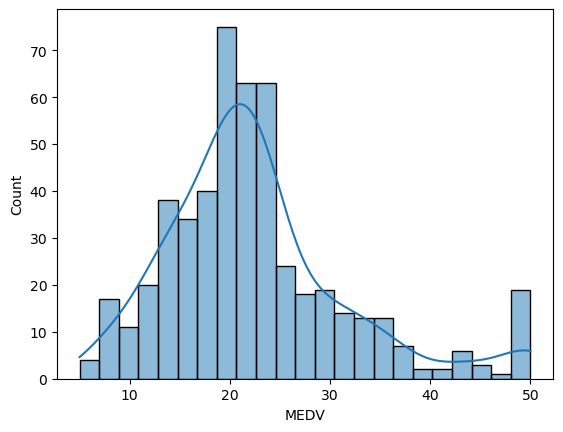

In [68]:
#Variável alvo
sns.histplot(data=dataset_or['MEDV'],kde=True)
plt.show()

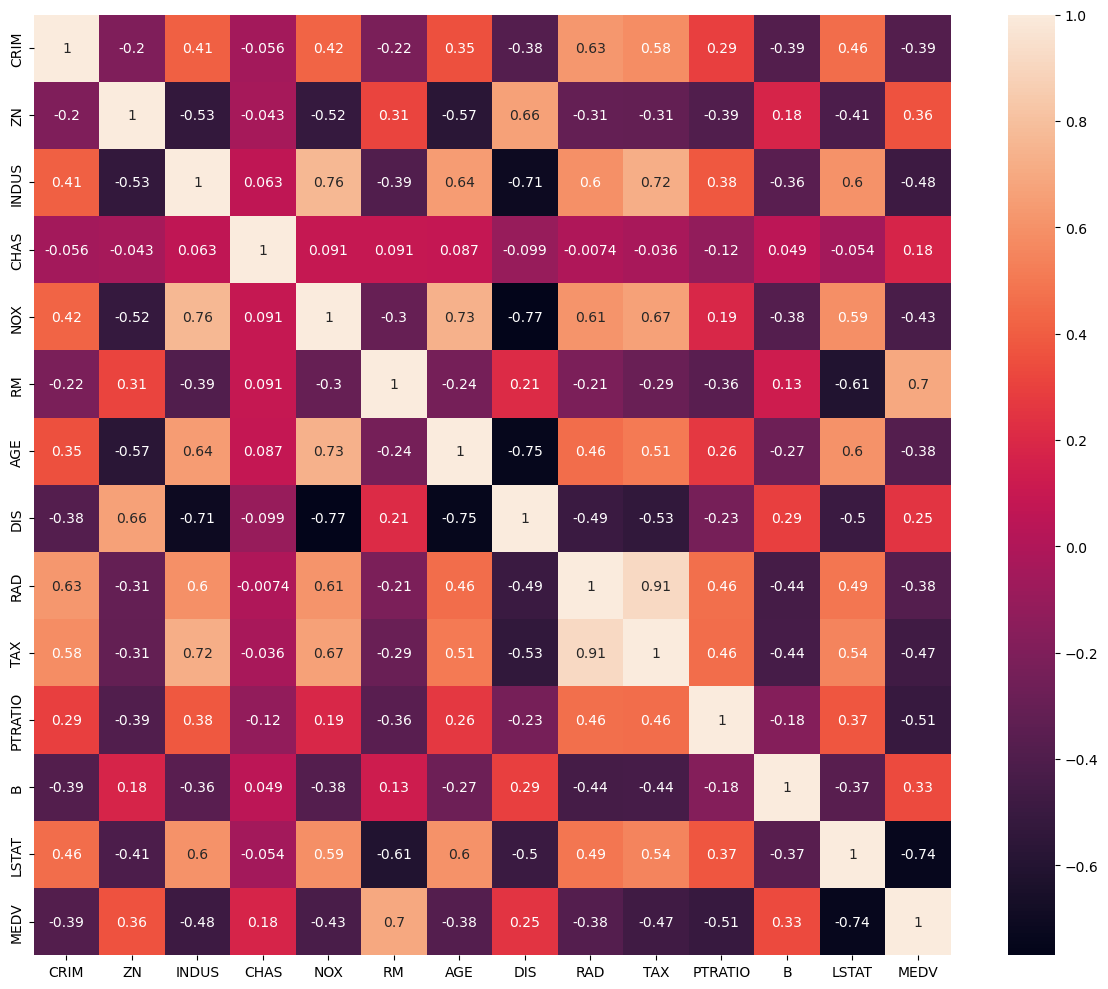

In [69]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset_or.corr(),annot=True)
plt.tight_layout()

plt.show()

- Observamos que as variáveis que mais possuem correlação com a variável target são LSTAT (correlação negativa 0.74) e RM (correlação positiva 0.70)
- As features LSTAT, PTRATIO, RM, INDUS e TAX possuem uma boa correlação com MEDV (variável target), se classificando como possíveis boas preditoras
- RAD e TAX são features com alta correlação entre si. Possivelmente necessário eliminar uma delas. 

In [70]:
#Removendo RAD do dataset (devido à alta correlação com TAX, que já será usada como feature)
dataset=dataset_or.copy().drop(columns='RAD')

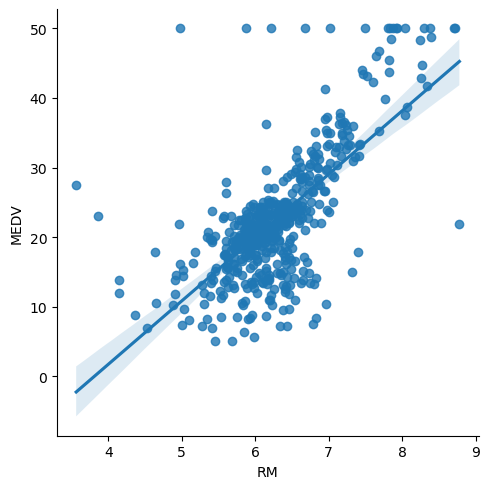

In [71]:
#Gráfico de dispersão entre RM e a variável target
sns.lmplot(data=dataset,x='RM',y='MEDV')

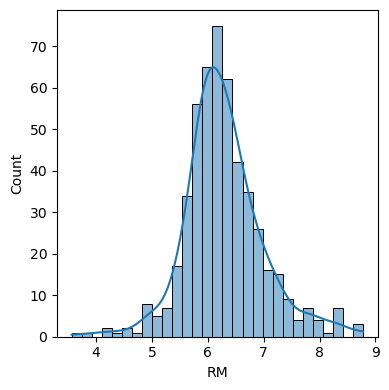

In [72]:
#Histograma de RM
plt.figure(figsize=(4,4))
sns.histplot(data=dataset['RM'],kde=True)

plt.tight_layout()
plt.show()

### PRÉ-PROCESSAMENTO DOS DADOS

In [73]:
columns_out = ['LSTAT','PTRATIO','RM','MEDV']

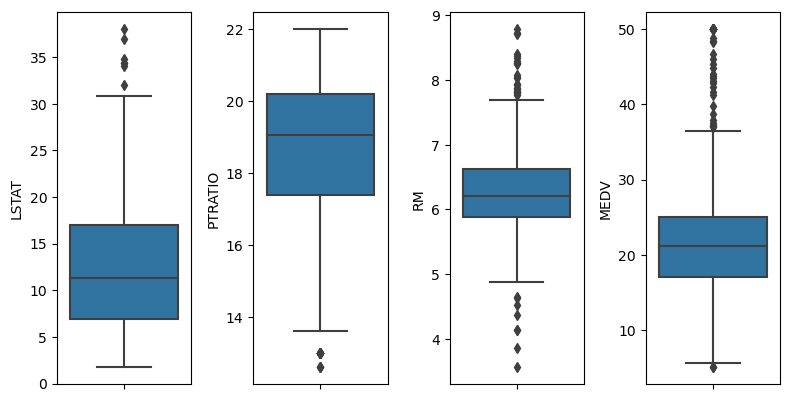

In [74]:
plt.figure(figsize=(8,8))
for i,col in enumerate(columns_out):
    plt.subplot(2,4,i+1)
    sns.boxplot(data=dataset,y = col)
plt.tight_layout()
plt.show()

In [75]:
apoio = np.array(len(dataset) * [True])

for coluna in columns_out:
    q1 = np.quantile(dataset[coluna], 0.25)
    q3 = np.quantile(dataset[coluna], 0.75)
    iqr = q3 - q1
    lim_min = q1 - (1.5 * iqr)
    lim_max = q3 + (1.5 * iqr)
    apoio = (dataset[coluna] >= lim_min) & (dataset[coluna] <= lim_max) & apoio

# Filtra o DataFrame com base no array booleano 'apoio'
df_2 = dataset[apoio]


In [76]:
1-len(df_2)/len(dataset)

0.12450592885375489

### PADRONIZAÇÃO DOS DADOS - Feature Scalling

In [77]:
#train_test split
from sklearn.model_selection import train_test_split

In [78]:
y = df_2['MEDV']
x = df_2.drop('MEDV',axis=1)

In [79]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.25)
print(x_treino.shape,x_teste.shape,y_treino.shape,y_teste.shape)

(332, 12) (111, 12) (332,) (111,)


In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
scaler.fit(x_treino)

x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

### Modelos

Serão testados os modelos padrão de regressão linear (linear regression, lasso e e ridge), além do modelo random forest

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,explained_variance_score

MAE: 2.28
MSE_root: 2.91
R2_score: 0.76


<AxesSubplot:xlabel='MEDV'>

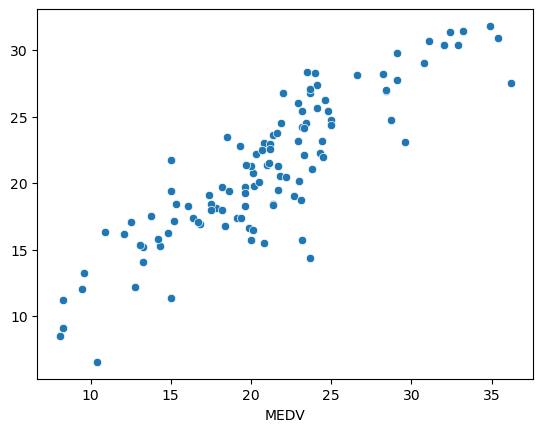

In [83]:
#LinearRegression
model_v1 = LinearRegression()
model_v1.fit(x_treino,y_treino)

pred_v1 = model_v1.predict(x_teste)

MAE = mean_absolute_error(y_teste,pred_v1)
MSE = mean_squared_error(y_teste,pred_v1)
MSE_root = np.sqrt(MSE)
R2_score_1 = r2_score(y_teste,pred_v1)

print('MAE: %.2f'%MAE)
print('MSE_root: %.2f'%MSE_root)
print('R2_score: %.2f'%R2_score_1)

sns.scatterplot(x=y_teste,y=pred_v1)

MAE: 2.75
MSE_root: 3.53
R2_score: 0.65


<AxesSubplot:xlabel='MEDV'>

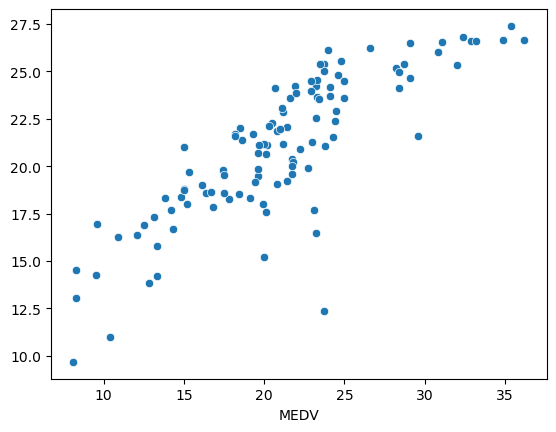

In [84]:
#Lasso
model_v2 = Lasso()
model_v2.fit(x_treino,y_treino)

pred_v2 = model_v2.predict(x_teste)

MAE = mean_absolute_error(y_teste,pred_v2)
MSE = mean_squared_error(y_teste,pred_v2)
MSE_root = np.sqrt(MSE)
R2_score_2 = r2_score(y_teste,pred_v2)

print('MAE: %.2f'%MAE)
print('MSE_root: %.2f'%MSE_root)
print('R2_score: %.2f'%R2_score_2)

sns.scatterplot(x=y_teste,y=pred_v2)


MAE: 2.28
MSE_root: 2.91
R2_score: 0.76


<AxesSubplot:xlabel='MEDV'>

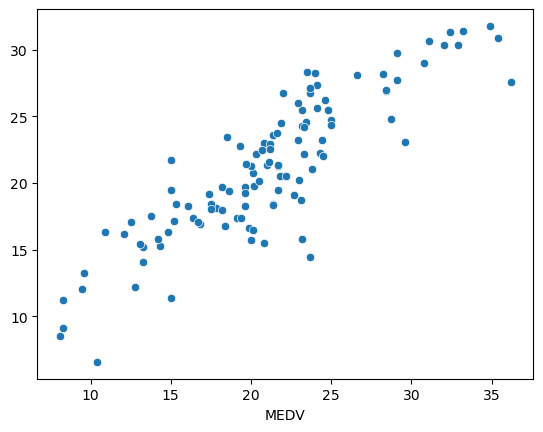

In [85]:
#Ridge
model_v3 = Ridge()
model_v3.fit(x_treino,y_treino)

pred_v3 = model_v3.predict(x_teste)

MAE = mean_absolute_error(y_teste,pred_v3)
MSE = mean_squared_error(y_teste,pred_v3)
MSE_root = np.sqrt(MSE)
R2_score_3 = r2_score(y_teste,pred_v3)

print('MAE: %.2f'%MAE)
print('MSE_root: %.2f'%MSE_root)
print('R2_score: %.2f'%R2_score_3)

sns.scatterplot(x=y_teste,y=pred_v3)

In [86]:
#RandomForest

from sklearn.ensemble import RandomForestRegressor

model_v4 = RandomForestRegressor()
model_v4.fit(x_treino,y_treino)

RandomForestRegressor()

MAE: 2.00
MSE_root: 2.57
R2_score: 0.81


<AxesSubplot:xlabel='MEDV'>

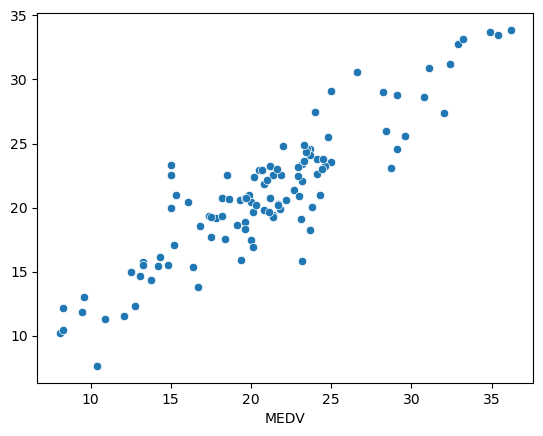

In [87]:
pred_v4 = model_v4.predict(x_teste)
MAE = mean_absolute_error(y_teste,pred_v4)
MSE = mean_squared_error(y_teste,pred_v4)
MSE_root = np.sqrt(MSE)
R2_score_4 = r2_score(y_teste,pred_v4)

print('MAE: %.2f'%MAE)
print('MSE_root: %.2f'%MSE_root)
print('R2_score: %.2f'%R2_score_4)

sns.scatterplot(x=y_teste,y=pred_v4)

<AxesSubplot:xlabel='Feature', ylabel='Importance'>

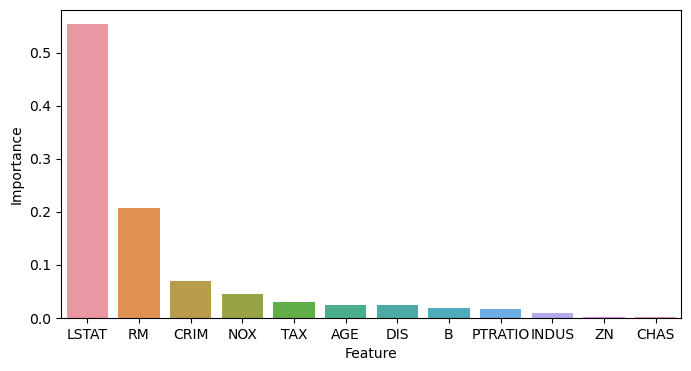

In [88]:
#Features importance

importance = model_v4.feature_importances_
sup = list(x)

sup_df = pd.DataFrame({'Importance':importance,'Feature':sup})
sup_df2 = sup_df.sort_values(by='Importance',ascending=False)

fig,ax = plt.subplots(figsize=(8,4))
sns.barplot(data=sup_df2,x='Feature',y='Importance')

BASELINE

O modelo de baseline vai conter apenas features às quais a agência tinha acesso antes do Census, ou seja, "RM", "DIS", "TAX". Ele é um modelo de regressão linear em sklearn.

In [89]:
baseline_features = ['RM','DIS','TAX']

x.columns
x_treino

df_normalizado_treino = pd.DataFrame(x_treino,columns=x.columns)
df_normalizado_teste = pd.DataFrame(x_teste,columns=x.columns)

dfn_treino_bl = df_normalizado_treino[baseline_features]
dfn_teste_bl = df_normalizado_teste[baseline_features]

x_treino_bl = np.array([dfn_treino_bl[coluna].values for coluna in baseline_features]).T
x_teste_bl = np.array([dfn_teste_bl[coluna].values for coluna in baseline_features]).T

model_bl = LinearRegression()
model_bl.fit(x_treino_bl,y_treino)
pred_bl = model_bl.predict(x_teste_bl)

MAE = mean_absolute_error(y_teste,pred_bl)
MSE = mean_squared_error(y_teste,pred_bl)
MSE_root = np.sqrt(MSE)
R2_score_bl = r2_score(y_teste,pred_bl)

print('MAE: %.2f'%MAE)
print('MSE_root: %.2f'%MSE_root)
print('R2_score: %.2f'%R2_score_bl)

MAE: 3.11
MSE_root: 3.94
R2_score: 0.56


### Comparando os modelos


In [90]:
modelos = pd.DataFrame({'Modelo':['LinearRegression','Lasso','Ridge','RandomForest','BaseLine'],'R2_Score':\
           [R2_score_1,R2_score_2,R2_score_3,R2_score_4,R2_score_bl]})
modelos

,Modelo,R2_Score
0,LinearRegression,0.761716
1,Lasso,0.649263
2,Ridge,0.761870
3,RandomForest,0.813741
4,BaseLine,0.563442


In [91]:
#Aumento no score
max_score = modelos.loc[modelos[modelos.R2_Score==modelos.R2_Score.max()].index,'R2_Score']
min_score = modelos.loc[modelos['Modelo']=='BaseLine','R2_Score']

score_win = ((max_score.iloc[0]-min_score.iloc[0])/min_score.iloc[0])*100
score_win

44.4232668994422

### Ganho financeiro

In [92]:
dif_baseline = abs(pred_bl-y_teste)/y_teste
dif_rf = abs(pred_v4-y_teste)/y_teste

In [93]:
impact = pd.DataFrame({'valor_real':y_teste,'pred_baseline':pred_bl,'pred_randomforest':pred_v4,'dif_baseline':dif_baseline\
                      ,'dif_rf':dif_rf})

In [94]:
impact['Ganho_BL']=impact.apply(lambda x:x['pred_baseline'] if x['dif_baseline']<=0.20 else 0,axis=1)
impact['Ganho_RF']=impact.apply(lambda x:x['pred_randomforest'] if x['dif_rf']<=0.20 else 0,axis=1)

print('Ganho total real: R$',round(impact['valor_real'].sum(),2),'K')
print('Ganho total modelo baseline: R$',round(impact['Ganho_BL'].sum(),2),'K')
print('Ganho total modelo random forest: R$',round(impact['Ganho_RF'].sum(),2),'K')

Ganho total real: R$ 2330.3 K
Ganho total modelo baseline: R$ 1705.02 K
Ganho total modelo random forest: R$ 2114.8 K


In [95]:
total_real = round(impact['valor_real'].sum(),2)
total_BL = round(impact['Ganho_BL'].sum(),2)
total_RF = round(impact['Ganho_RF'].sum(),2)

print('O modelo baseline cobre',round((total_BL)*100/total_real,2),'% do TAM total')
print('O novo modelo Random Forest cobre',round((total_RF)*100/total_real,2),'% do TAM total')

O modelo baseline cobre 73.17 % do TAM total
O novo modelo Random Forest cobre 90.75 % do TAM total
